# LeNet5: a Convolutional Neural Network success story

In this notebook, you will apply a famous Convolutional Neural Network, LeNet5, to the MNIST dataset. Most of the work will be *exactly* as for the MNIST MLP notebook... thus you will now see a lot of blank code blocks! Do not worry, and take code from the previous notebooks when you are stuck! 

# 1. Setting up the environment
OK, you cannot exactly know what you will need to run this notebook, thus we help you! Here is what you need to import...

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adadelta, Adam, SGD
from keras.datasets import mnist
from keras import backend as K
K.set_image_data_format('channels_first')
import numpy as np

Using TensorFlow backend.


# 2. The data: MNIST dataset
We load the MNIST dataset, as in the previous notebook, but then, we need to pad the images with an empty margin, because LeNet5, the CNN we will implement, needs 32x32 images!

In [3]:
# the data, split between train and test sets
(X_train_, y_train), (X_test_, y_test) = mnist.load_data()

# Padding the images, to meet the correct LeNet5 input shape (see below)
X_train = np.pad(X_train_, ((0,0),(2,2),(2,2)), 'constant')
X_test  = np.pad(X_test_, ((0,0),(2,2),(2,2)), 'constant')

Time to extract the usual information from the dataset, and also turn `y_train` and `y_test` into one-hot-encoded vectors!

In [4]:
n_classes = 10
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

n_train_samples = X_train.shape[0]
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
n_test_samples  = X_test.shape[0]

print("Training dataset: {} images, each one of size {}x{} pixels".format(n_train_samples, img_rows, img_cols))
print("Test dataset: {} images".format(n_test_samples))

Training dataset: 60000 images, each one of size 32x32 pixels
Test dataset: 10000 images


# 3. Preprocessing the data
Same as before, remember: input to our CNN will have to consist of floating point arrays with values between 0 and 1. This time you don't need to vectorize the images!

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Now there is something new! In the previous notebooks, we were using MLPs, which take vectors as images. In this notebook, we use Convolutional Neural Networks, which actually use four-dimensional tensors as input! As you probably remember, there are two formats, commonly used for CNN data: `NCWH` and `NWHC`, also known as `channels_first` or `channels_last`. Thus, you will have to reshape the CNN inputs, namely `X_train` and `X_test`.
The MNIST data is loaded as a three-dimensional arary, and if we had to describe its format, we would say it is `NWH`. Let us reshape it! To do so, we define the variable `input_shape` based on the needed format, then, we simply reshape our input data.

Hint: remember that our data is given in gray scale, thus it only has `1` channel!

In [6]:
# TODO: assign the right input shape for both cases, channels_first (NCWH) and channels_last (NWHC)
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)


X_train = X_train.reshape(n_train_samples, input_shape[0], input_shape[1], input_shape[2])
X_test = X_test.reshape(n_test_samples, input_shape[0], input_shape[1], input_shape[2])

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (60000, 1, 32, 32)
X_test shape: (10000, 1, 32, 32)


# 4. Visualizing the data
Well, not so much to do here. You can shamelessly copy-paste from the previous notebook, or simply skip this part! Let's just put an empty code block here, you know, just in case...

# 5. Applying a Neural Network to the problem
This time, you will walk into the footsteps of AI pioneers Yann LeCun, Yoshua Bengio, and others, and you will replicate their breakthrough network, _LeNet5_.
From [Wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network#LeNet-5):
>LeNet-5, a pioneering 7-level convolutional network by LeCun et al. in 1998, that classifies digits, was applied by several banks to recognize hand-written numbers on checks (British English: cheques) digitized in 32x32 pixel images. The ability to process higher resolution images requires larger and more layers of convolutional neural networks, so this technique is constrained by the availability of computing resources. 

Here is a picture explaining what the architecture looks like:
![](../scratch/imgs/lenet5.png)

Four hints:

- There is no padding in the convolutions.
- The number before the `@` symbol is the number of channels of the layer.
- Subsampling is `AveragePooling2D`. Even though other types of poolings might be acceptable...
- You cannot use the output of a convolutional layer as input for a fully connected layer, you will have to put a `Flatten()` layer inbetween.
- Remember to compile the model! You can use the usual loss function and metrics. As optimizer, Adadelta or Adam with standard parameters will be fine.

If you have time, or need more details, why not take a look at the original cornerstone paper? [Here is a link to it](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf).

In [7]:
lenet5 = keras.Sequential()
lenet5.name='Lenet5'

#TODO create the Lenet5 convolutional neural network! 
# Remember that `kernel_size` is a tuple, representing width and height of the filters!

first_layer_kernel_size = (5,5)
first_layer_num_filters = 6
lenet5.add(Conv2D(filters=first_layer_num_filters,
                  kernel_size=first_layer_kernel_size,
                  activation='relu', input_shape=input_shape))
lenet5.add(AveragePooling2D())
lenet5.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
lenet5.add(AveragePooling2D())
lenet5.add(Flatten())
lenet5.add(Dense(units=120, activation='relu'))
lenet5.add(Dense(units=84, activation='relu'))
lenet5.add(Dense(units=10, activation = 'softmax'))

lenet5.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

Print the model summary and check that is as you expected it to be!

In [8]:
lenet5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 28, 28)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 14, 14)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 10, 10)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

Now define the training parameters, and start the `fit` function! Then, check the test accuracy!

In [9]:
batch_size = 32
epochs     = 20

history_callback = lenet5.fit(X_train, Y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(X_test, Y_test))
score = lenet5.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.1806 - acc: 0.9435 - val_loss: 0.0645 - val_acc: 0.9790
Epoch 2/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0588 - acc: 0.9817 - val_loss: 0.0377 - val_acc: 0.9878
Epoch 3/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0429 - acc: 0.9868 - val_loss: 0.0346 - val_acc: 0.9892
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0353 - acc: 0.9898 - val_loss: 0.0362 - val_acc: 0.9886
Epoch 5/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0281 - acc: 0.9912 - val_loss: 0.0343 - val_acc: 0.9901
Epoch 6/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0243 - acc: 0.9924 - val_loss: 0.0261 - val_acc: 0.9915
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0211 - acc: 0.9936 - val_loss: 0.0288 - 

# 6. Bonus! Visualizing the layer activations
In this last section, we visualize the activation levels of each layer. To do this, we start by dissecting the model. We first isolate the output of the layers which maintain the spatial information of the image (for Lenet5 this means the first four layers, can you say why?). Then, we create a model which takes those layers, sends in an input and get out an output... as if we were just ignoring the layer after the ones we referenced.

In [9]:
# Extract the outputs of the top 4 layers (those which keep the spatial information)
layer_outputs = [layer.output for layer in lenet5.layers[:4]]
# Create a model that will return these outputs, given the model input
activation_model = keras.models.Model(inputs=lenet5.input, outputs=layer_outputs)

Now we select an image, and we take a slice of the test set, corresponding to that image only.

In [22]:
image_index = 9793

img_tensor = X_test[image_index:image_index+1]
activations = activation_model.predict(img_tensor)

And now, we plot the activation of each layer! What do you see? Can you understand what each layer specialized into? Check with different images to get a better understanding!

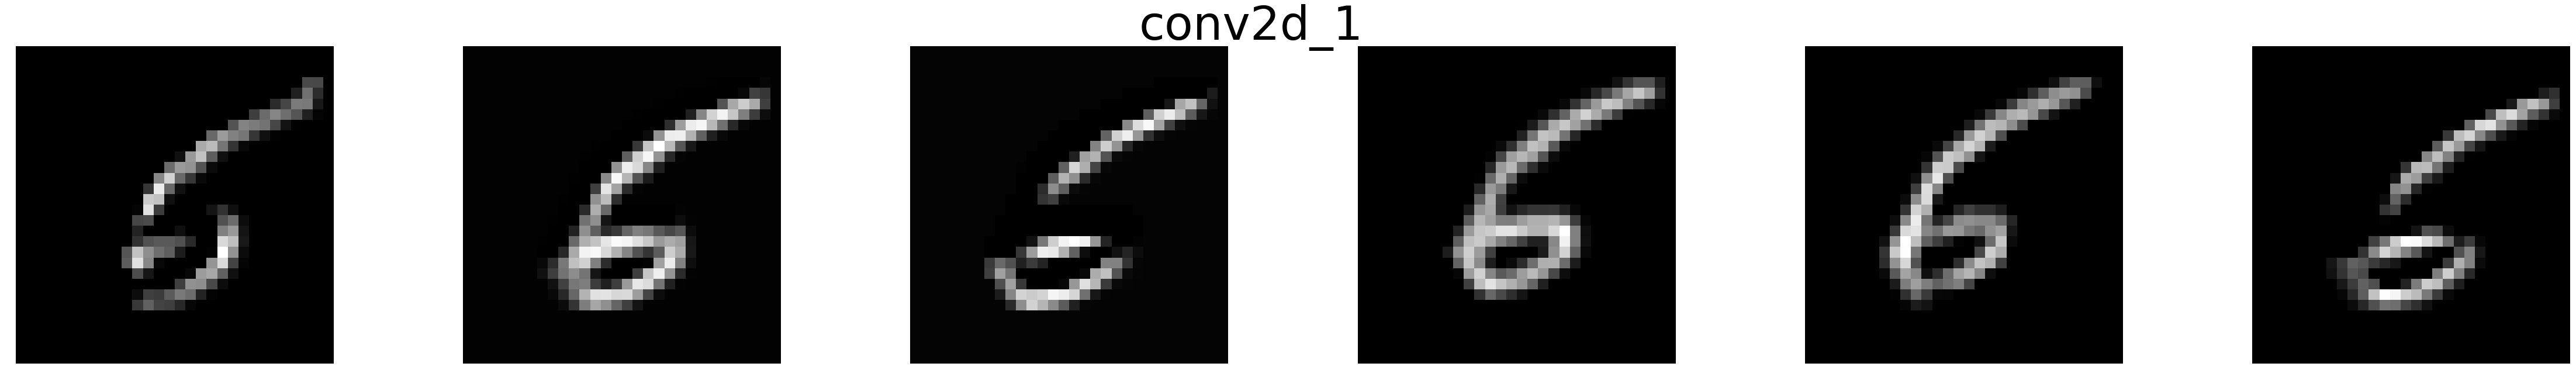

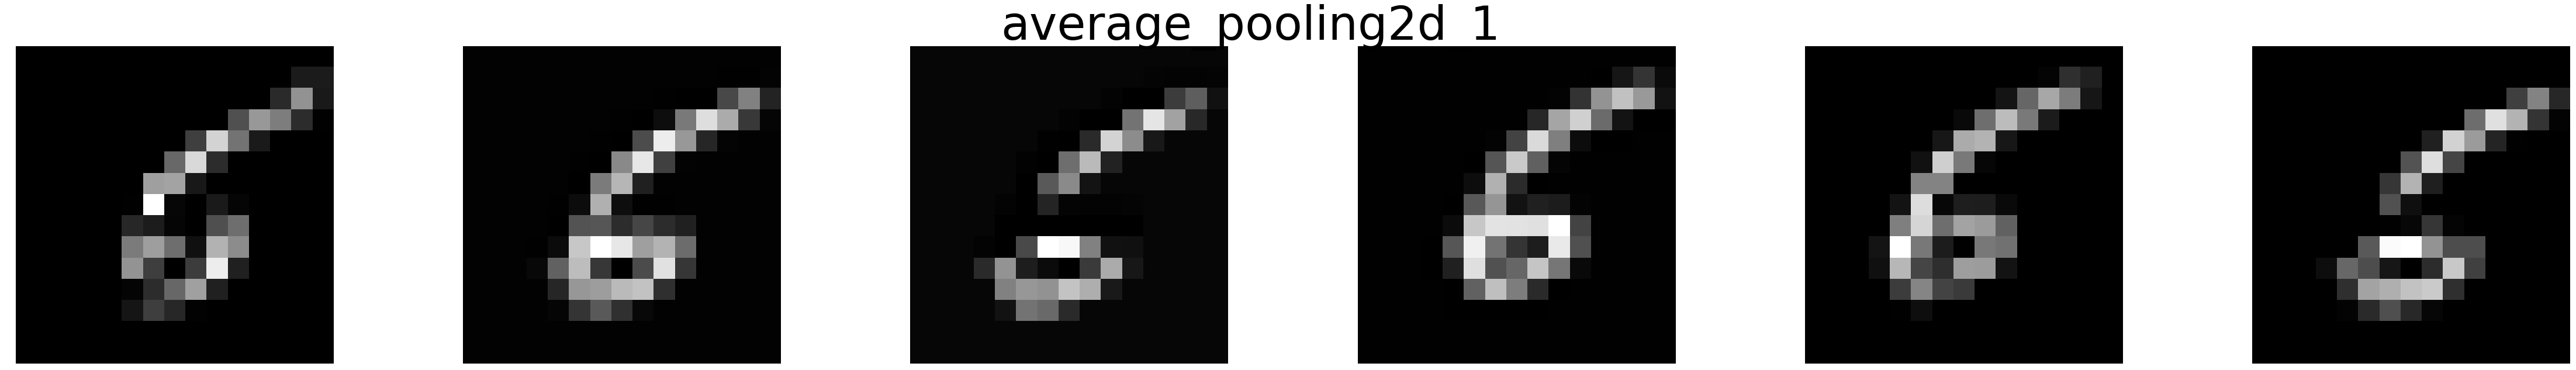

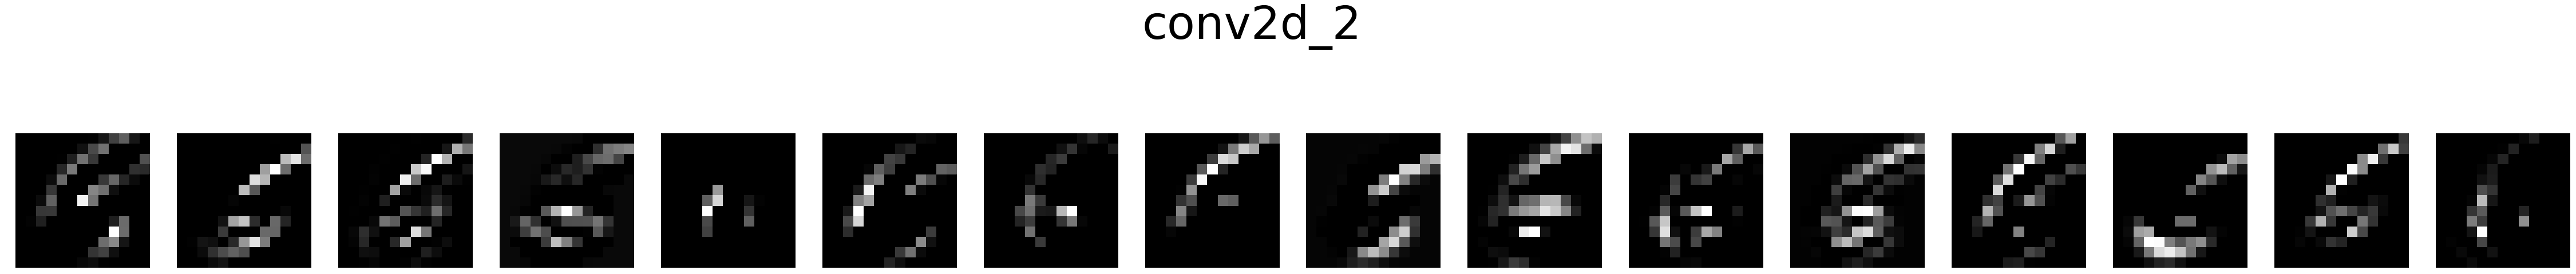

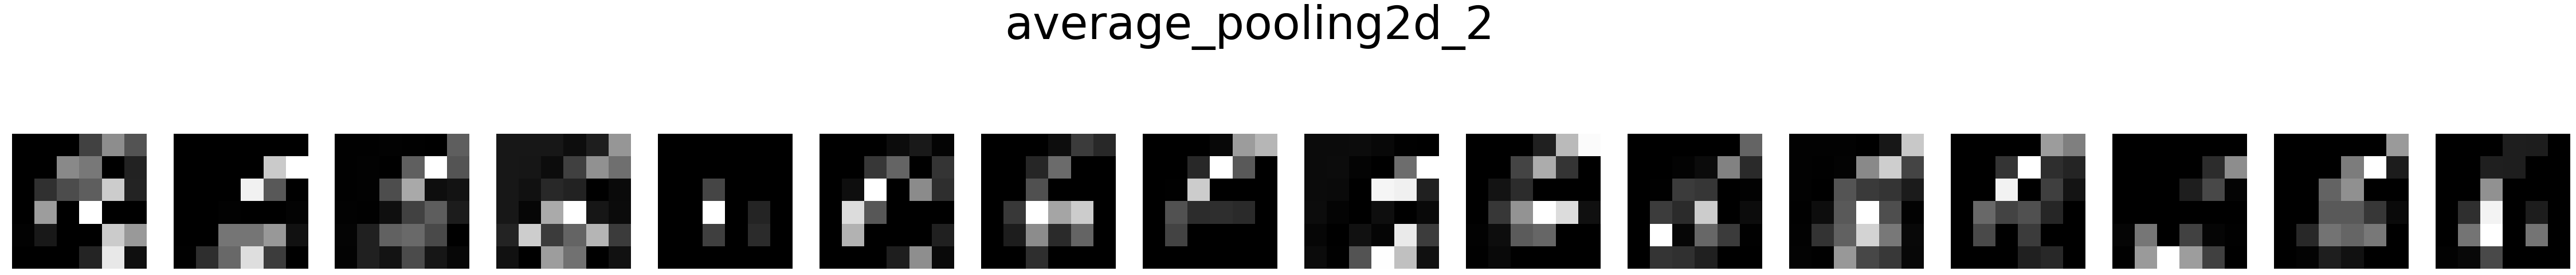

In [23]:
for i, activation in enumerate(activations):
    fig=plt.figure(figsize=(80,10));
    for j in range((activation).shape[1]):
        plt.subplot(1, (activation).shape[1], j+1);
        if K.image_data_format() == 'channels_first':
            plt.matshow(activation[0, j, :, :], cmap='gray', fignum=False);
        else:
            plt.matshow(activation[0, :, :, j], cmap='gray', fignum=False);
        plt.axis('off')
    fig.suptitle(lenet5.layers[i].name, fontsize=80)


Now it is your turn! Take LeNet5 to the next level! Create a new, improved model, based on LeNet5. Consider you have way more computational power than the authors had in 1998! Can you beat their test accuracy? You can plot the data contained in `history_callback` to have a better idea of what happened at training time... here is an empty code block to get you started!

In [80]:
# TODO use this block as a scratchpad!

# 7. Optional assignment (to do once you're satisfied with your network)
In their paper, the authors show the samples which were mis-classified by the network. Can you do the same here? Are the mistakes understandable? Some functions you might want to use: `predict_classes` from Keras ([look here!](https://keras.io/models/model/)) and from NumPy you might find useful
- `!=` can be used for component-wise comparison of equal sized tensors
- `where` ([here!](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html))
- `squeeze` ([here!](https://docs.scipy.org/doc/numpy/reference/generated/numpy.squeeze.html))

Total mis-classified test samples: 89


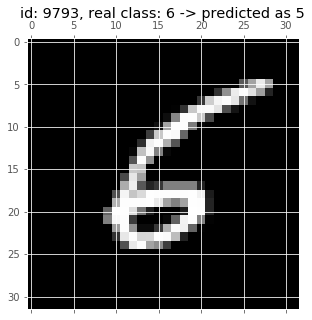

In [21]:
predictions = lenet5.predict_classes(X_test)

mis_class_ids = np.squeeze(np.where(predictions!=y_test))
image_index = mis_class_ids[-1]

print("Total mis-classified test samples:", len(mis_class_ids))

plt.figure(figsize=(5,5))
plt.title("id: {}, real class: {} -> predicted as {}".format(image_index, y_test[image_index], predictions[image_index]));

if K.image_data_format() == 'channels_first':
    plt.matshow(X_test[image_index,0,:,:], fignum=False, cmap='gray');
else:
    plt.matshow(X_test[image_index,:,:,0], fignum=False, cmap='gray');